# Lending Club Case Study
This company is the largest online loan marketplace, facilitating different kind of loans where borrowers can easily access lower interest rate loans through a fast online interface. 
In this bussiness Lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss)

The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. 

In [1]:
# Import libraries required 
#For Data Reading and Analysis
import pandas as pd 
import numpy as np
#For Data Plotting to charts
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read data from CSV using Pandas in loan data frame 
loandf = pd.read_csv('loan.csv', low_memory = False)
loandf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [3]:
#Show shape
shape = loandf.shape
print('Shape :', shape)
print('#Rows :', shape[0])
print('#Columns :', shape[1])

Shape : (39717, 111)
#Rows : 39717
#Columns : 111


Get top few data and understand it

In [4]:
loandf.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Looking at the data and we see there are many columns which may not be usefull 
and similary there will be many rows which may be having invalid data

Now lets do some data cleaning and try to keep only data which will help us

# Step 1 - Data Cleaning

In [5]:
# see missing values
loandf.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

Above data tells us that there are lot of columns which have more number of missing data
so lets find them and remove it from data frame

In [6]:
nacolumns_percentage = loandf.isnull().sum() * 100 / len(loandf)
nacolumns_df = loandf.columns[nacolumns_percentage > 80]
nacolumns_df

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [7]:
# Drop all the columns with more than 70%
loandf_clean = loandf.drop(nacolumns_df , axis =1)

In [8]:
#Lets check the data again
nacolumns_percentage = loandf_clean.isnull().sum() * 100 / len(loandf)
nacolumns_percentage

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


In [9]:
#Desc and mths_since_last_delinq still have more missing data
#Lets see how that data looks for more than 1% missing data
loandf_clean.loc[:,nacolumns_percentage > 3]

,emp_title,desc,mths_since_last_delinq
0,NaN,Borrower added on 12/22/11 > I need to upgra...,NaN
1,Ryder,Borrower added on 12/22/11 > I plan to use t...,NaN
2,NaN,NaN,NaN
3,AIR RESOURCES BOARD,Borrower added on 12/21/11 > to pay for prop...,35.0
4,University Medical Group,Borrower added on 12/21/11 > I plan on combi...,38.0
...,...,...,...
39712,FiSite Research,Our current gutter system on our home is old a...,0.0
39713,"Squarewave Solutions, Ltd.",The rate of interest and fees incurred by carr...,5.0
39714,NaN,NaN,0.0
39715,NaN,NaN,0.0


In [10]:
# All columns do does not seem important for analysis 
# so lets drop them as well
loandf_clean = loandf_clean.drop(loandf_clean.columns[nacolumns_percentage > 3] , axis =1)

In [11]:
#Lets check the data again
nacolumns_percentage = loandf_clean.isnull().sum() * 100 / len(loandf)
nacolumns_percentage

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths           

Now lets remove columns which we do not require for our Analysis

In [12]:
loandf_clean = loandf_clean.drop([
    'member_id',
    'inq_last_6mths', 
    'url', 
    'zip_code',
    'earliest_cr_line',
    'pymnt_plan',
 'initial_list_status',
 'chargeoff_within_12_mths',
 'total_rec_late_fee',
 'collection_recovery_fee',
 'pub_rec','revol_util',  
 'collections_12_mths_ex_med',
 'policy_code',
 'delinq_amnt',
 'tax_liens',
 'application_type',
 'acc_now_delinq',
'delinq_2yrs',
'out_prncp',
'total_acc',
'total_pymnt',
'total_pymnt_inv',
'total_rec_prncp',
'total_rec_int',
'last_pymnt_d',
'last_credit_pull_d',
'open_acc'],
 axis = 1)

In [13]:
loandf_clean.info()
loandf_clean.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39717 non-null  int64  
 1   loan_amnt             39717 non-null  int64  
 2   funded_amnt           39717 non-null  int64  
 3   funded_amnt_inv       39717 non-null  float64
 4   term                  39717 non-null  object 
 5   int_rate              39717 non-null  object 
 6   installment           39717 non-null  float64
 7   grade                 39717 non-null  object 
 8   sub_grade             39717 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

(39717, 24)

In [14]:
#Lets see fully paid vs ChargedOff
loandf_clean['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

We do not need Current so lets remove them

In [15]:
loandf_clean = loandf_clean[~(loandf_clean['loan_status'] == 'Current')]

In [41]:
# Remove missing rows ?
loandf_clean = loandf_clean.dropna(axis=1, how='all')
loandf_clean.shape

(38577, 27)

In [40]:
loandf_clean.shape

(38577, 27)

In [19]:
loandf_clean['term_val'] = loandf_clean['term'].apply(lambda x: x[0:3])

In [20]:
loandf_clean.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,purpose,title,addr_state,dti,revol_bal,out_prncp_inv,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,term_val
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,...,credit_card,Computer,AZ,27.65,13648,0.0,0.00,171.62,0.0,36
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,...,car,bike,GA,1.00,1687,0.0,117.08,119.66,0.0,60
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,...,small_business,real estate business,IL,8.72,2956,0.0,0.00,649.91,0.0,36
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,...,other,personel,CA,20.00,5598,0.0,0.00,357.48,0.0,36
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,...,wedding,My wedding loan I promise to pay back,AZ,11.20,7963,0.0,0.00,161.03,0.0,36


# Lets start EDA - Univariate Analysis

In [21]:
# Checking funded amount 
loandf_clean["funded_amnt"].value_counts()

10000    2719
12000    2161
5000     2017
6000     1876
15000    1732
         ... 
1650        1
30100       1
19675       1
21275       1
22350       1
Name: funded_amnt, Length: 1019, dtype: int64

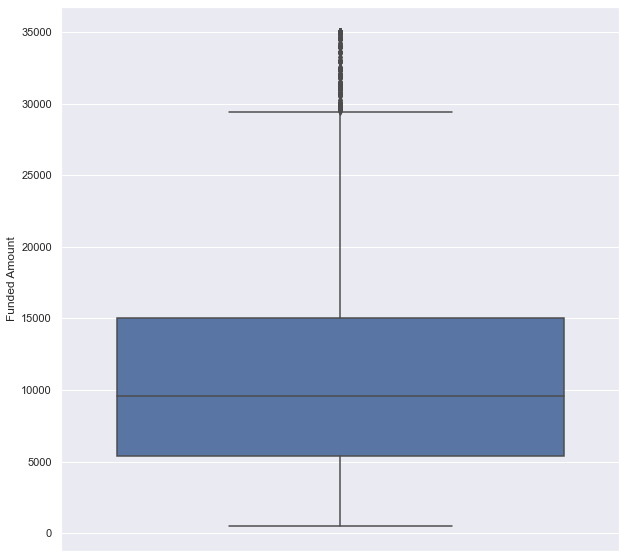

In [45]:
sns.boxplot( y=loandf_clean["funded_amnt"] )
plt.ylabel('Funded Amount')
plt.show()

In [87]:
# remove % from interest rate
loandf_clean['int_rate'] = loandf_clean['int_rate'].apply(lambda x: x[0:-4])




['11',
 '10',
 '7',
 '13',
 '12',
 '14',
 '15',
 '6',
 '9',
 '16',
 '8',
 '5',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

<AxesSubplot:>

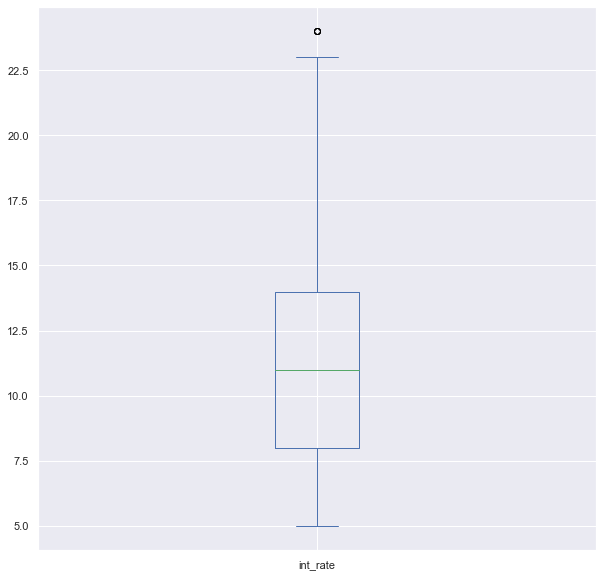

In [91]:

loandf_clean["int_rate"] = loandf_clean["int_rate"].astype("int32")
loandf_clean["int_rate"].plot.box()

Above we can see there are many outliners

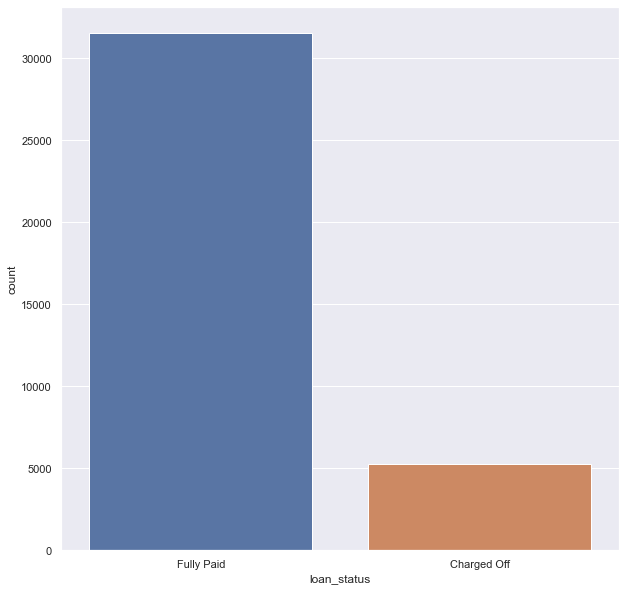

In [46]:
#Lets see fully paid vs ChargedOff
sns.countplot(x= loandf_clean["loan_status"])
plt.show()

Convert Fully Paid and Charged off to 1 and 0 so its easier to anlysis

In [25]:
dfloan = loandf_clean

In [26]:
dfloan['status_val'] = dfloan['loan_status'].apply(lambda x: 1 if x == 'Fully Paid' else 0)
dfloan['status_val'].dtype

dtype('int64')

In [27]:
#Total Charged Off percentage 
len(dfloan[dfloan['status_val'] == 0])/len(loandf_clean) * 100

14.586411592399617

#### 14% have defaulted

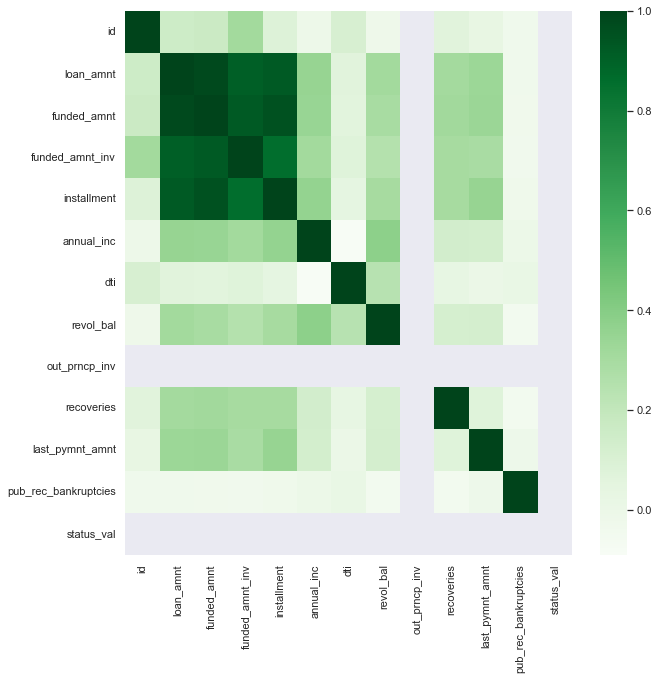

In [28]:
sns.set(rc={'figure.figsize':(10,10)})
chargedoff_df = dfloan[dfloan['status_val'] == 0]
fullypaid_df = dfloan[dfloan['status_val'] == 1]
sns.heatmap(data=chargedoff_df.corr(),cmap="Greens")
plt.show()

From above we can see dark areas have high correlation

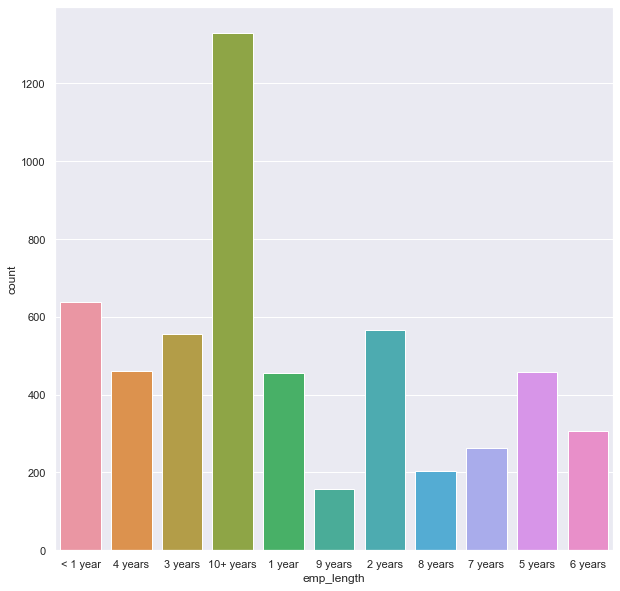

In [29]:
#Now lets see amoung chargedoff how employee lenght are spread out 
sns.countplot(x='emp_length', data=chargedoff_df)
plt.show()

We can see 10+ years are maximum defaulted and now lets seee with grade

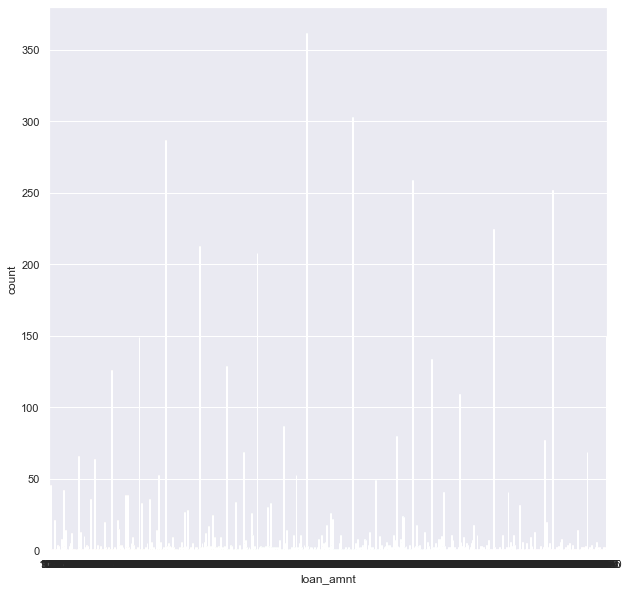

In [30]:
sns.countplot(x='loan_amnt', data=chargedoff_df)
plt.show()


Above plot is not very helpful as it continous data lets bin them

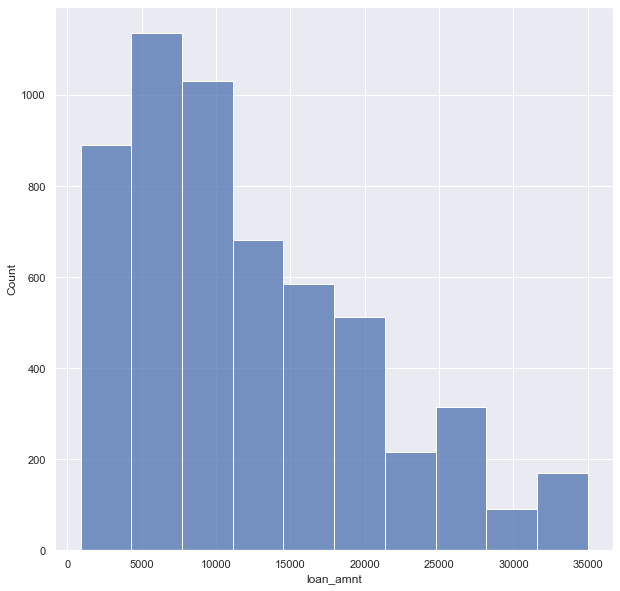

In [31]:
sns.histplot(chargedoff_df['loan_amnt'] , bins=10)
plt.show()


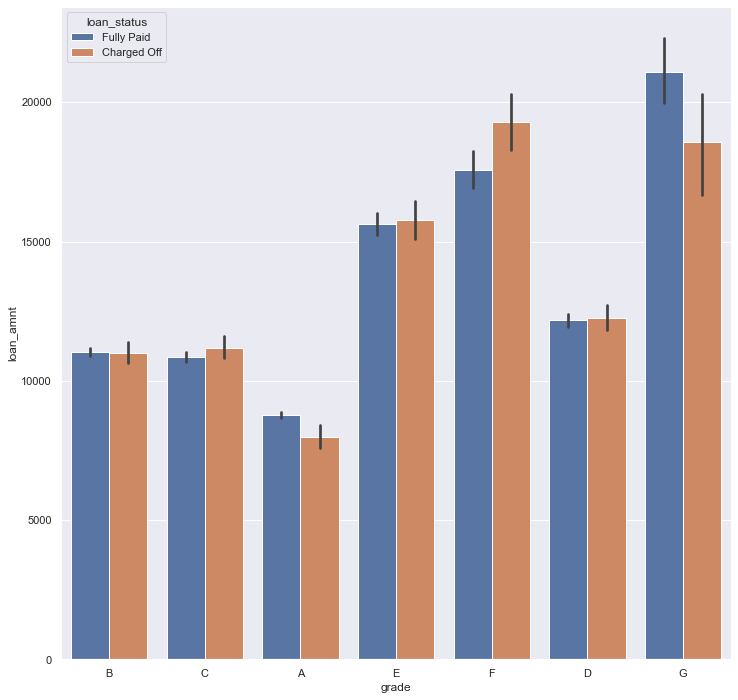

In [47]:
plt.figure(figsize=(12,12))
sns.barplot(data =dfloan,x='grade', y='loan_amnt', hue ='loan_status')
plt.show()

F grade are defaulting more and G are defaulting less

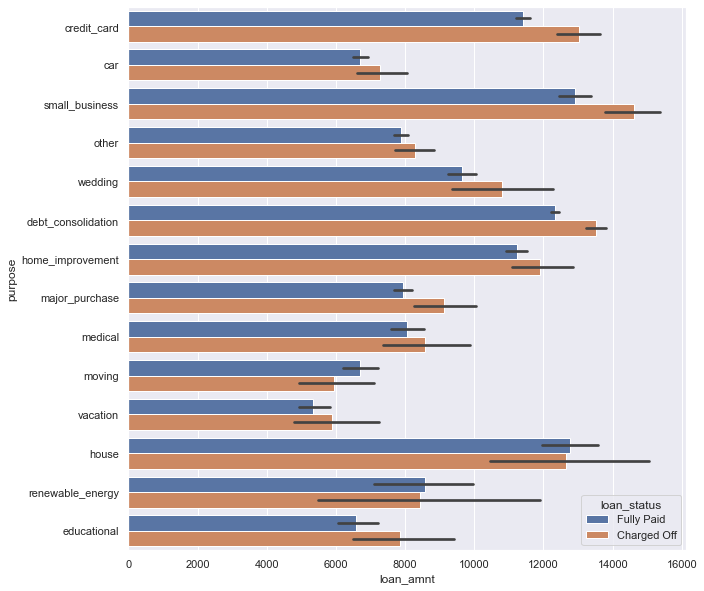

In [33]:
sns.barplot(data =dfloan,x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()

Small  Bussiness group has defaulted more

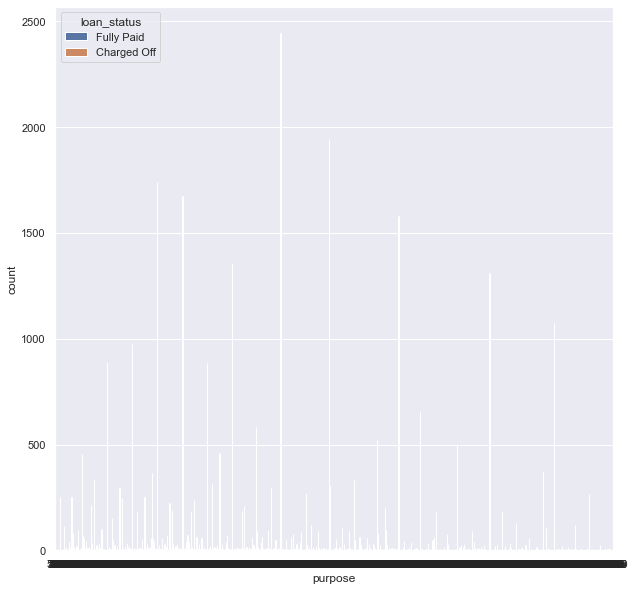

In [34]:
sns.countplot( x="loan_amnt", hue='loan_status', data=dfloan)
plt.xlabel('purpose')
plt.show()

In [35]:
dfloan['loan_bin'] = pd.cut(dfloan['loan_amnt'], 10)

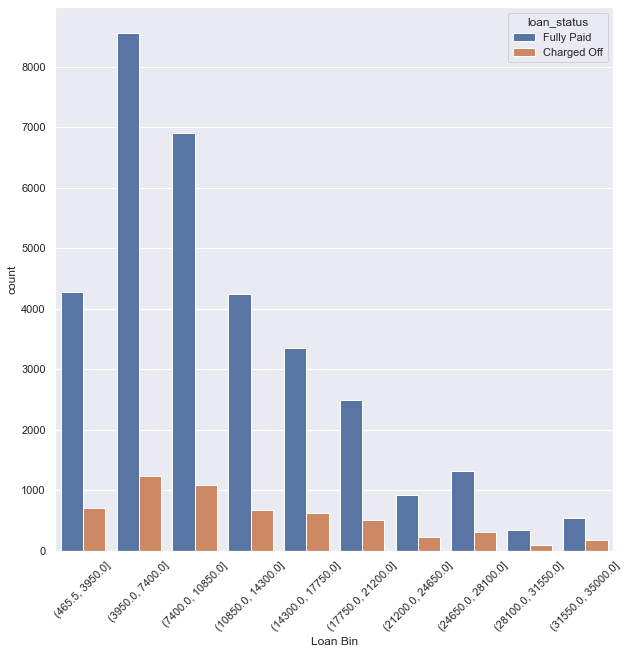

In [36]:
sns.countplot( x="loan_bin", hue='loan_status', data=dfloan)
plt.xlabel('Loan Bin')
plt.xticks(rotation=45)
plt.show()

Maxium defaults in range



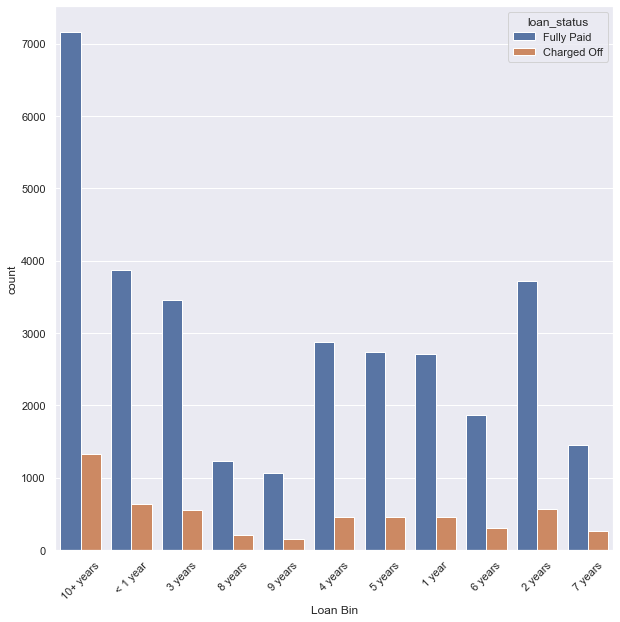

In [50]:
sns.countplot( x="emp_length", hue='loan_status', data=dfloan)
plt.xlabel('Loan Bin')
plt.xticks(rotation=45)
plt.show()

10 years+ default percentage is less

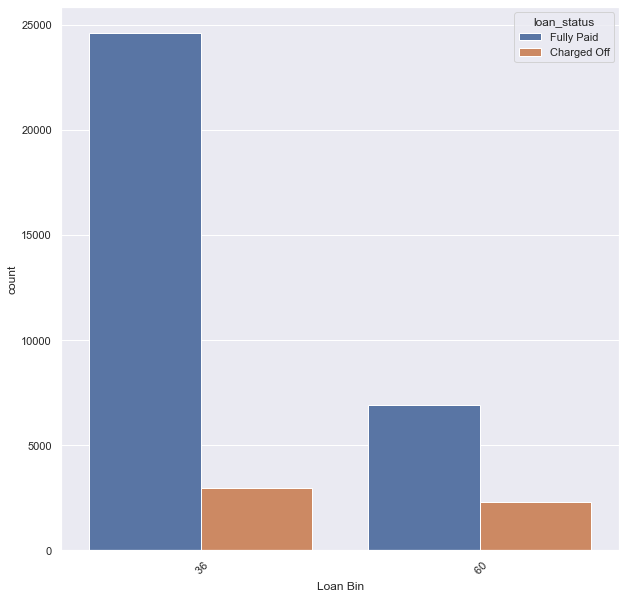

In [48]:
sns.countplot( x="term_val", hue='loan_status', data=dfloan)
plt.xlabel('Loan Bin')
plt.xticks(rotation=45)
plt.show()